In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import pylab
from datetime import datetime

In [2]:
df_user = pd.read_json('D:/desk_2104/CS Sem4/CS6220/Project/dataset/user.json', lines=True)

In [3]:
df_test = df_user

In [4]:
total_users = len(df_test)

In [5]:
print("Total number of users are:",total_users)

Total number of users are: 1183362


In [6]:
#checking for any wrong data
len(df_test.loc[df_test['review_count'] <0]) #no negative value of review_count

0

In [7]:
#checking for any wrong data
len(df_test.loc[(df_test['average_stars'] <0) | df_test['average_stars'] > 5]) #no wrong value of average_stars

0

In [8]:
df_test.head()

,average_stars,compliment_cool,compliment_cute,compliment_funny,compliment_hot,compliment_list,compliment_more,compliment_note,compliment_photos,compliment_plain,...,cool,elite,fans,friends,funny,name,review_count,useful,user_id,yelping_since
0,3.80,5174,284,5174,5175,78,299,1435,7829,7397,...,16856,"[2014, 2016, 2013, 2011, 2012, 2015, 2010, 2017]",209,"[M19NwFwAXKRZzt8koF11hQ, QRcMZ8pJJBBZaKubHOoMD...",16605,Cin,272,17019,lsSiIjAKVl-QRxKjRErBeg,2010-07-13
1,3.94,1556,211,1556,1285,101,134,1295,162,2134,...,40110,"[2014, 2017, 2011, 2012, 2015, 2009, 2013, 200...",835,"[eoSSJzdprj3jxXyi94vDXg, QF0urZa-0bxga17ZeY-9l...",10882,Andrea,2559,83681,om5ZiponkpRqUNa3pVPiRg,2006-01-18
2,4.72,15,1,15,5,0,1,11,8,20,...,55,[],17,"[Oa84FFGBw1axX8O6uDkmqg, SRcWERSl4rhm-Bz9zN_J8...",4,Gabe,277,45,-lGwMGHMC_XihFJNKCJNRg,2014-10-31
3,3.76,9,0,9,1,0,1,4,1,11,...,4,"[2016, 2017]",11,"[96DJovjKAtExnyBZRfniPQ, Djczq-bRn761U4FW77NUt...",4,Leah,436,15,D-ydMTPGWXTVm4_jjp0k9g,2013-04-01
4,4.23,276,0,276,59,0,8,51,169,386,...,6006,"[2017, 2016]",49,"[iN0A6QIrEFYoSGHFaknh8Q, B2HDoWNIzLlon0IhS1cmD...",360,Juan,921,9152,PcvbBOCOcs6_suRDH7TSTg,2012-08-16


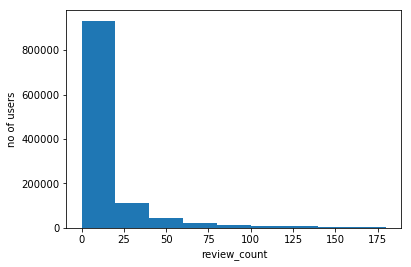

In [9]:
bins = range(0,3000, 500)
plt.hist(df_test['review_count'], bins=range(0,200, 20))
plt.xlabel('review_count')
plt.ylabel('no of users')

In [10]:
median_rc = df_test['review_count'].median()
max_rc = df_test['review_count'].max()
min_rc = df_test['review_count'].min()

In [11]:
print("Median value for review count is:", median_rc)
print("Maximum value for review count is:", max_rc)
print("Minimum value for review count is:", min_rc)

Median value for review count is: 5.0
Maximum value for review count is: 11656
Minimum value for review count is: 0


In [12]:
#Users with average stars as 5 or 0
c_avg_5star = len(df_test.loc[df_test['average_stars'] == 5.00])
c_avg_0star = len(df_test.loc[df_test['average_stars'] == 0.00])
print("Count of users with all 5 stars rating:", c_avg_5star)
print("Count of users with all 0 stars rating:", c_avg_0star)

Count of users with all 5 stars rating: 232987
Count of users with all 0 stars rating: 0


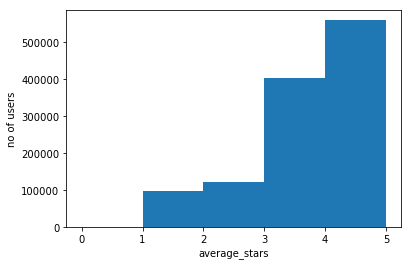

In [13]:
bins = range(0,6, 1)
plt.hist(df_test['average_stars'], bins)
plt.xlabel('average_stars')
plt.ylabel('no of users')

In [14]:
median_avg_stars = df_test['average_stars'].median()
max_avg_stars = df_test['average_stars'].max()
min_avg_stars = df_test['average_stars'].min()

In [15]:
print("Median value for average stars given by users is:", median_avg_stars)
print("Maximum value for average stars given by users is:", max_avg_stars)
print("Minimum value for average stars given by users is:", min_avg_stars)

Median value for average stars given by users is: 3.89
Maximum value for average stars given by users is: 5.0
Minimum value for average stars given by users is: 1.0


In [16]:
min_date = min(df_test['yelping_since'])
max_date = max(df_test['yelping_since'])

In [17]:
df_test['yelping_since'] = pd.to_datetime(df_test['yelping_since'])

In [18]:
count_list = df_test.groupby(df_test['yelping_since'].map(lambda y: y.year)).count()['yelping_since']

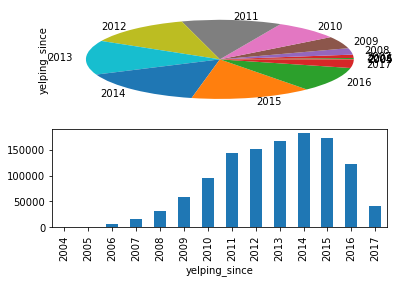

In [19]:
fig, axs = plt.subplots(2)

df_test.groupby([df_test["yelping_since"].map(lambda y: y.year)]).count()['yelping_since'].plot(kind="pie", ax= axs[0])
df_test.groupby([df_test["yelping_since"].map(lambda y: y.year)]).count()['yelping_since'].plot(kind="bar", ax = axs[1], y= "no of users")

Above graph showing the users joining the Yelp. There is increase in number of users joining from 2005 to 2014 and then again there is continuous dip in number of users joining the yelp.